In [5]:
import h5py
import numpy as np
import random
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [6]:
pions1 = h5py.File('/fast_scratch/QVAE/data/atlas/pions1.hdf5','r')
photons1 = h5py.File('/fast_scratch/QVAE/data/atlas/photons1.hdf5','r')
photons2 = h5py.File('/fast_scratch/QVAE/data/atlas/photons2.hdf5','r')

In [7]:
particle_list = [pions1, photons1, photons2]
particle_type = 0 #0, 1 or 2
for x in particle_list[particle_type].keys():
    print(particle_list[particle_type][x])   #3 keys: incident energy, total energy registered in voxels, and energy per voxel total number of events is 120230
#print(pions1["voxels"][10])

<HDF5 dataset "energy": shape (120230, 1), type "<f8">
<HDF5 dataset "energy_from_voxels": shape (120230, 1), type "<f8">
<HDF5 dataset "voxels": shape (120230, 533), type "<f8">


Creating datasets and finding voxel averages

In [8]:
particles_data = []
avg_voxels = []
for particle in particle_list:
    dataset = np.array(particle["voxels"])
    particles_data.append(dataset)
    #inc_energies = np.array(particle["energy"])
    #calo_energies = np.array(particle["energy_from_voxels"])
    num_events, num_voxels = np.shape(particle["voxels"])
    avg_voxel = np.zeros(num_voxels)
    number_of_events_averaging_over = num_events
    for i in range(number_of_events_averaging_over):
        avg_voxel = avg_voxel+dataset[i]
    avg_voxel = avg_voxel/number_of_events_averaging_over
    avg_voxels.append(avg_voxel)
print([np.shape(avg_voxels[i]) for i in range(len(avg_voxels))])

[(533,), (368,), (368,)]


Normalize data using average per voxel

In [9]:
scaled_particle_data = []
for i, particle in enumerate(particle_list):
    dataset = np.array(particle["voxels"])
    reciprocal_arr = 1/avg_voxels[i]
    scaled_dataset = dataset*reciprocal_arr
    scaled_particle_data.append(scaled_dataset)
    
print(np.shape(scaled_particle_data))

(3,)


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


Remove negative values

In [ ]:
'''epsilon = 1e-2
arrmin = np.amin(scaled_dataset2[:,])
if arrmin < 0 and not np.isnan(arrmin):
    scaled_dataset2[:,] -= arrmin
    scaled_dataset2[:,] += epsilon
    print(arrmin)''' #no negative values in this data set

In [10]:
pions1_scaled = h5py.File('/fast_scratch/QVAE/data/atlas_scaled/pions1_gs.hdf5','w')
photons1_scaled = h5py.File('/fast_scratch/QVAE/data/atlas_scaled/photons1_gs.hdf5','w')
photons2_scaled = h5py.File('/fast_scratch/QVAE/data/atlas_scaled/photons2_gs.hdf5','w')

In [11]:
hdfs_scaled = [pions1_scaled, photons1_scaled, photons2_scaled]
print(pions1_scaled)
print(len(scaled_particle_data[0]))

<HDF5 file "pions1_gs.hdf5" (mode r+)>
120230


Inverse transform

In [12]:
inv_data = []
'''scaled_data2 = np.where(scaled_data2 > 0., scaled_data2, np.inf)
arrmins = [[]]
epsilon = 1e-2

for j in range(scaled_data2.shape[1]):
    arrmin = arrmins[j]
    if arrmin < 0. and not np.isnan(arrmin):
        nparr[:, j] -= epsilon
        nparr[:, j] += arrmin '''

inv_data = scaled_particle_data[0]*avg_voxels[0]

#scaled_data2 = np.where(np.isnan(scaled_data2), 0, scaled_data2)
#not checked for negative values as input data does not have any

Check inverse transformations on input data

In [13]:
for j in range(scaled_particle_data[0].shape[1]):
        diff = np.sum(scaled_particle_data[0][:, j] - inv_data[:, j])
        if diff > 0:
            print(i, j, diff)

Plot histogram of the energy averages

In [ ]:
#bin_list = np.arange(0, 30)
plt.hist(pions1["voxels"])
plt.xlabel("Raw voxel energy") #energy scale?
plt.ylabel("Counts")
plt.title("Pions histogram")
plt.show()
#plt.scatter(range(1, num_events+1), average_voxel, color = 'orange')
#print(average_voxel)

In [ ]:
#bin_list = np.arange(0, 50)
plt.hist(scaled_particle_data[0])
plt.xlabel("Scaled voxel energy") #energy scale?
plt.ylabel("Counts")
plt.title("Pions histogram")
plt.show()
#plt.scatter(range(1, num_events+1), average_voxel, color = 'orange')
#print(average_voxel)

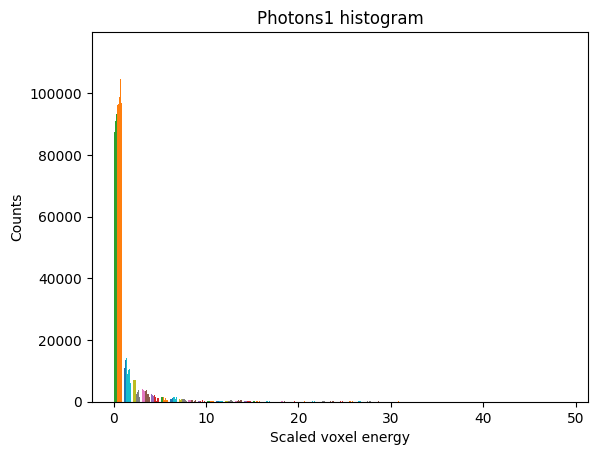

In [16]:
bin_list = np.arange(0, 50)
plt.hist(scaled_particle_data[1], bins = bin_list)
plt.xlabel("Scaled voxel energy") #energy scale?
plt.ylabel("Counts")
plt.title("Photons1 histogram")
plt.show()
#plt.scatter(range(1, num_events+1), average_voxel, color = 'orange')
#print(average_voxel)